# create model 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.interpolation']='nearest'

In [2]:
def initialize_parameters_deep(layer_dims):
  np.random.seed(3)
  l = len(layer_dims)
  parameters = {}
  for i in range(1,l):
      parameters["W"+str(i)] = np.random.randn(layer_dims[i],layer_dims[i-1])/np.sqrt(layer_dims[i-1])
      parameters["b"+str(i)] = np.zeros((layer_dims[i],1))

  return parameters

In [3]:
def linear_forward(A,W,b):
  Z = np.dot(W,A) + b
  cache = (A,W,b)
  return Z , cache

In [4]:
def linear_activation_forward(A_prev,W,b,activation):
  Z ,cache_= linear_forward(A_prev,W,b)
  A = activation(Z)
  cache = (cache_,Z)
  return A , cache

In [43]:
def sigmoid(x,derivation = False):
  x = np.array(x,dtype=np.longdouble)
  if derivation :
    dA = sigmoid(x)*(1-sigmoid(x))
    assert(dA.shape == x.shape)
    return dA
  A = (1/(1+np.exp(-x)))
  assert(A.shape == x.shape)
  return A


In [52]:
def relu(x , derivation=False):
  x = np.array(x)
  if derivation :
    dA = x
    dA[dA>0] = 1
    dA[dA<=0] = 0
    assert(dA.shape == x.shape)
    return dA
  A = np.maximum(0,x)
  assert(A.shape == x.shape)
  return A

In [53]:
def tanh(x,derivation=False):
  x = np.array(x)
  if derivation :
    dA = 1-np.power(np.tanh(x),2)
    assert(dA.shape == x.shape)
    return dA
  A = np.tanh(x)
  assert(A.shape == x.shape)
  return A

In [54]:
def leaky_relu(x , derivation=False):
  x = np.array(x)
  if derivation :
    dA = x
    dA[dA>0] = 1
    dA[dA<=0] = 0.01
    assert(dA.shape == x.shape)
    return dA
  A = x
  A[A<=0] = 0.01 * A[A<=0] 
  assert(A.shape == x.shape)
  return A

In [58]:
def L_model_forward(X,parameters,activations = []):
  l = len(parameters) // 2
  a = len(activations)
  act=activations
  for _ in range(l-a-1):
    act.append(relu)
  A_ = X
  caches = []
  for i in range(1,l):
    A_ , cache = linear_activation_forward(A_,parameters["W"+str(i)],parameters["b"+str(i)],act[i-1])
    caches.append(cache)
  A_,cache = linear_activation_forward(A_,parameters["W"+str(l)],parameters["b"+str(l)],sigmoid)
  caches.append(cache)
  assert(A_.shape == (1,X.shape[1]))
  return A_ , caches,activations

In [10]:
def compute_cost(y_hat,y):
  temp = -np.sum(np.multiply(y,np.log(y_hat)))
  temp += -np.sum(np.multiply((1-y),np.log(1-y_hat)))
  temp/= y.shape[1]
  return temp

In [11]:
def linear_backward(dZ,cache):
  AL_1 = cache[0]
  WL = cache[1]
  bL = cache[2]
  m = dZ.shape[1]
  dAL_1 = np.dot(WL.T,dZ)
  dWL = np.dot(dZ,AL_1.T)/m
  dbL = np.sum(dZ,axis=1,keepdims=True) / m
  assert(dAL_1.shape == AL_1.shape)
  assert(dWL.shape == WL.shape)
  assert(dbL.shape == bL.shape)
  return dAL_1,dWL,dbL

In [59]:
def linear_activation_backward(dA , caches , activation):
  Z = caches[1]
  #print(Z.shape)
  #A_prev = caches[0][0]
  #W = caches[0][1]
  #b = caches[0][2] derivation
  dZ = dA * activation(Z,derivation = True)
  dA_prev, dW , db = linear_backward(dZ,caches[0])
  return dA_prev, dW , db

In [75]:
def L_model_backward(y_hat ,y, cache,act=[] ):
  l = len(cache)
  a = len(act)
  actt=act
  y = y.reshape(y_hat.shape)
  # for i in range(l-a):
  #   actt.append(relu)
  grad = {}
  # dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
  m=y.shape[1]
  dAL = -np.divide(y,y_hat) + np.divide(1-y,1-y_hat)
  dA_ , dW , db = linear_activation_backward(dAL,cache[-1],sigmoid)
  grad['dA'+str(l)] = dAL
  grad['dA'+str(l-1)] = dA_
  grad["dW"+str(l)] = dW
  grad["db"+str(l)] = db
  for i in range(l-1,0,-1):
    dA_ , dW , db = linear_activation_backward(dA_,cache[i-1],actt[i-1])
    grad['dA'+str(i-1)] = dA_
    grad["dW"+str(i)] = dW
    grad["db"+str(i)] = db
  return grad

In [63]:
def update_parameters(param , grad , alpha):
  l = len(param) // 2
  for i in range(1,l+1):
    param["W"+str(i) ] = param["W"+str(i)] - alpha * grad["dW"+str(i)]
    param["b"+str(i) ] = param["b"+str(i)] - alpha * grad["db"+str(i)]

  return param

In [67]:
def accuracy(AL , Y):
    Al = (AL>=0.5) * 1 
    out = np.sum(Al == Y) / Y.shape[1]
    return out

In [97]:
class model:
    object_number = 0
    def __init__(self,name,dims,activations=[]):
        model.object_number += 1
        self.name = name
        self.activations = activations
        self.dims = dims
        self.accuracy_value = None
        self.parameters = initialize_parameters_deep(self.dims)
    def predict(self,X,prob=False):
        AL , cache , active = L_model_forward(X,self.parameters , self.activations)  
        if prob:
            return A2
        out = (A2>=0.5) * 1
        return out
    def accuracy(self,AL , Y):
        Al = (AL>=0.5) * 1 
        out = np.sum(Al == Y) / Y.shape[1]
        return out
    # def accuracy(self,X,Y):
    #     y_hat = self.predict(X)
    #     correct = np.sum(y_hat == Y)
    #     return (correct / Y.shape[1])*100
    def train(self,X,Y,epochs,alpha,validation,verbose=False):
        costs = []
        train_acc = []
        test_acc = []
        param = self.parameters
        for i in range(epochs):
            AL , cache , active = L_model_forward(X,param , self.activations)
            self.activations = active 
            AL_t , cache_t , active_t = L_model_forward(validation[0],param , active)
            cost = compute_cost(AL , Y)
            costs.append(cost)
            grad = L_model_backward(AL,Y,cache,active)
            self.parameters = update_parameters(param , grad , alpha)
            param = self.parameters
            train_a = self.accuracy(AL,Y)
            test_a = self.accuracy(AL_t , validation[1])
            train_acc.append(train_a)
            test_acc.append(test_a)
            if verbose and i % 100 == 0 :
                print(f"iteration:{i}\ncost:{cost}\ntrain_acc:{train_a}\ntest_acc:{test_a}\n********************************************")
        self.accuracy_value = (train_a , test_a)
        #self.activations = active 
        plt.figure(figsize=(16,4))
        plt.subplot(1,3,1)
        plt.plot(costs)
        plt.title("costs")
        plt.subplot(1,3,2)
        plt.plot(train_acc)
        plt.title("train_accuracy")
        plt.subplot(1,3,3)
        plt.plot(test_acc)
        plt.title("test_accuracy")
        return param #, costs , train_acc , test_acc  

In [22]:
def predict(X,Y,params,active):
  AL , cache , active = L_model_forward(X,param , active)
  return AL

# data preprocessing

In [18]:
import h5py
train_dataset = h5py.File("datasets/train_catvnoncat.h5" , 'r')
test_dataset = h5py.File("datasets/test_catvnoncat.h5" , 'r')
images_train = np.array(train_dataset["train_set_x"])
labels_train = np.array(train_dataset["train_set_y"]).reshape(1,-1)
images_test = np.array(test_dataset['test_set_x'])
labels_test = np.array(test_dataset['test_set_y']).reshape(1,-1)
X_train_m = images_train.T.reshape(-1,209)
X_test_m = images_test.T.reshape(-1,50)
X_train_ms = (X_train_m / 255.).astype("float32")
X_test_ms = (X_test_m / 255.).astype("float32")

# model training

In [92]:
model_2l = model("shallow_net_with_two_layers",(12288,4,1),[leaky_relu])

In [93]:
np.random.seed(1)
model_2l_parameters = model_2l.train(X_train_ms,labels_train,2500,0.0075,(X_test_ms,labels_test),True)

iteration:0
cost:0.6710707543002972
train_acc:0.6076555023923444
test_acc:0.4
********************************************
iteration:1
cost:0.6592062890479955
train_acc:0.6555023923444976
test_acc:0.34
********************************************
iteration:2
cost:0.6493158206700498
train_acc:0.6555023923444976
test_acc:0.34
********************************************
iteration:3
cost:0.6455799522956723
train_acc:0.6555023923444976
test_acc:0.34
********************************************
iteration:4
cost:0.6427735313236165
train_acc:0.6555023923444976
test_acc:0.34
********************************************
iteration:5
cost:0.6403133954041476
train_acc:0.6555023923444976
test_acc:0.34
********************************************
iteration:6
cost:0.6379818239122935
train_acc:0.6555023923444976
test_acc:0.34
********************************************
iteration:7
cost:0.6357196043994631
train_acc:0.6555023923444976
test_acc:0.34
********************************************
iteration

In [87]:
model_2l.accuracy_value

(0.9617224880382775, 0.78)

In [94]:
model_6l = model("deep_net_6layer_relu",(12288,128,64,32,16,8,1))

In [95]:
parma_model_6l = model_6l.train(X_train_ms,labels_train,2500,0.0075,(X_test_ms,labels_test),True)

iteration:0
cost:0.6943649841306019
train_acc:0.4449760765550239
test_acc:0.46
********************************************
iteration:1
cost:0.6912831687193546
train_acc:0.5789473684210527
test_acc:0.36
********************************************
iteration:2
cost:0.6875221360574424
train_acc:0.631578947368421
test_acc:0.3
********************************************
iteration:3
cost:0.683274966198394
train_acc:0.645933014354067
test_acc:0.34
********************************************
iteration:4
cost:0.6775033872216553
train_acc:0.6555023923444976
test_acc:0.34
********************************************
iteration:5
cost:0.6717732867983613
train_acc:0.6555023923444976
test_acc:0.34
********************************************
iteration:6
cost:0.6671408978155031
train_acc:0.6555023923444976
test_acc:0.34
********************************************
iteration:7
cost:0.6632817215826915
train_acc:0.6555023923444976
test_acc:0.34
********************************************
iteration:8


In [96]:
model_6l.accuracy_value

(1.0, 0.76)

In [98]:
model_5l = model("5_layer_deep_net_tanh",(12288,32,16,8,4,1),[tanh,tanh,tanh,tanh])

iteration:0
cost:0.7075873910635067
train_acc:0.3827751196172249
test_acc:0.6
********************************************
iteration:100
cost:0.628591017841475
train_acc:0.6555023923444976
test_acc:0.34
********************************************
iteration:200
cost:0.5839286385482679
train_acc:0.7272727272727273
test_acc:0.44
********************************************
iteration:300
cost:0.5155311902669972
train_acc:0.84688995215311
test_acc:0.58
********************************************
iteration:400
cost:0.48529215617013294
train_acc:0.784688995215311
test_acc:0.5
********************************************
iteration:500
cost:0.40633736624936195
train_acc:0.8995215311004785
test_acc:0.66
********************************************
iteration:600
cost:0.37315192284338944
train_acc:0.8995215311004785
test_acc:0.58
********************************************
iteration:700
cost:0.38807967776598246
train_acc:0.8516746411483254
test_acc:0.52
*****************************************

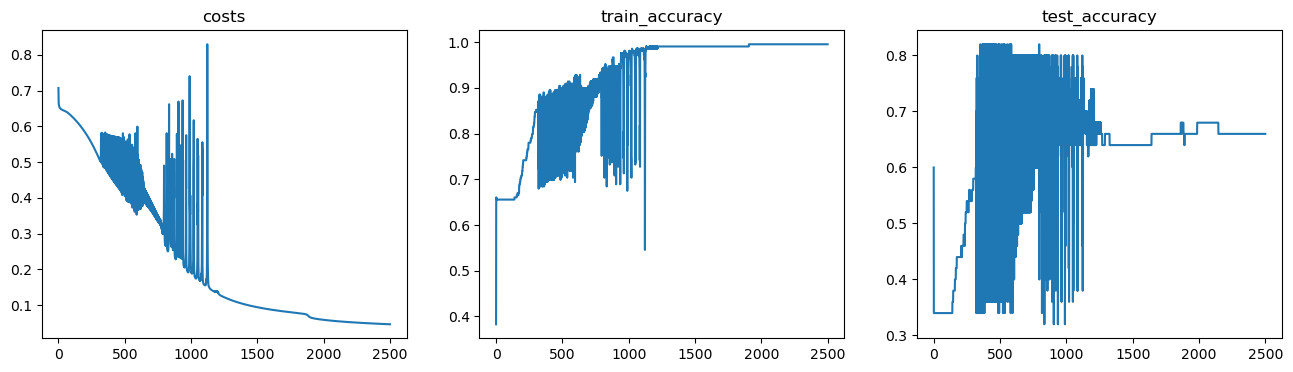

In [99]:
param_model_5l = model_5l.train(X_train_ms , labels_train,2500,0.0075,(X_test_ms,labels_test),True)